In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

Reading in the csv file

In [2]:
inp0 = pd.read_csv("bank-marketing.csv")
inp0.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Some basic information about the data set

In [3]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


Let's induce some missing values - in the `month` column
 - induce 50 missing values
        - pick 50 random values from the possible index values
        - assign the field value to be NaN at those indices

In [20]:
np.random.seed(42)

In [21]:
ind = np.random.randint(0, inp0.shape[0], 50)
inp0.loc[ind,"month"] = np.NaN

In [23]:
ind = np.random.randint(0, inp0.shape[0], 20)
inp0.loc[ind,"age"] = np.NaN

In [24]:
ind = np.random.randint(0, inp0.shape[0], 30)
inp0.loc[ind,"response"] = np.NaN

In [25]:
inp0.isnull().sum()

age          20
job           0
salary        0
marital       0
education     0
targeted      0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
dtype: int64

## Univariate analysis

In [26]:
inp0.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [27]:
inp0.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.619198,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [28]:
(inp0.salary == 0).sum()

288

In [34]:
inp0[(inp0.pdays>0)].pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Takeaway - 
 - for numeric values, look at detailed descriptive summary, not just mean and std
 - numerical variables can also have some encoding with a specific meaning 
 - **missing values don't always have to be present as NULLs!** We can have indicators

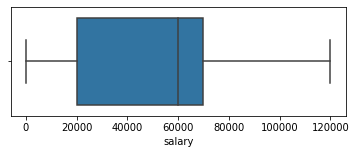

In [45]:
plt.figure(figsize=[6,2])
sns.boxplot(inp0.salary)
plt.show()

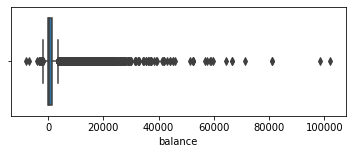

In [46]:
plt.figure(figsize=[6,2])
sns.boxplot(inp0.balance)
plt.show()

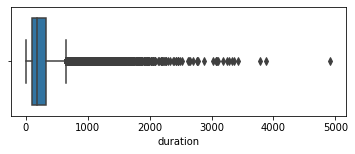

In [47]:
plt.figure(figsize=[6,2])
sns.boxplot(inp0.duration)
plt.show()

## Handling missing values

In [54]:
inp0.age.isnull().sum()/len(inp0)

0.00044237021963681403

In [ ]:
Types of missing values - 
 - Missing at random: no systematic bias in missing values presence
 - Not missing at random

In [56]:
inp0.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

In [57]:
inp0[~inp0.age.isnull()].response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

**Strategy 1: drop the records with missing values**  
1. low in proportion/ percent
2. at random
3. doesn not affect the task adversely

In [58]:
inp0.shape

(45211, 19)

In [59]:
inp1 = inp0[~inp0.age.isnull()]
inp1.shape

(45191, 19)

In [61]:
inp1.age.isnull().sum()

0

In [62]:
inp1.isnull().sum()

age           0
job           0
salary        0
marital       0
education     0
targeted      0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
dtype: int64

In [66]:
100*inp1.month.isnull().sum()/len(inp1)

0.11064149941360005

In [64]:
inp1.month.value_counts(normalize=True)

may    0.304380
jul    0.152522
aug    0.138123
jun    0.118141
nov    0.087880
apr    0.064908
feb    0.058616
jan    0.031058
oct    0.016327
sep    0.012760
mar    0.010545
dec    0.004741
Name: month, dtype: float64

Fill with some estimate - 
 - most common category

In [69]:
month_mode = inp1.month.mode()[0]
month_mode

'may'

In [71]:
inp1.month.fillna(month_mode, inplace=True)

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [72]:
inp1.month.value_counts(normalize=True)

may    0.305149
jul    0.152353
aug    0.137970
jun    0.118010
nov    0.087783
apr    0.064836
feb    0.058551
jan    0.031024
oct    0.016309
sep    0.012746
mar    0.010533
dec    0.004735
Name: month, dtype: float64

In [74]:
inp1.response.isnull().sum()/len(inp1)

0.0006638489964816003

In [75]:
inp1 = inp1[~inp1.response.isnull()]
inp1.shape

(45161, 19)

In [76]:
inp1.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [77]:
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

We want to treat these values as missing
 - ignore these values in our average/median/stat calculations
 - keep it NaN
 
Wherever pdays is -1, replace with NaN

In [78]:
inp1.loc[inp1.pdays<0,"pdays"] = np.NaN

In [79]:
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Working with extreme values

In [80]:
inp1.groupby('education')['balance'].mean()

education
primary      1252.144027
secondary    1155.234513
tertiary     1759.065708
unknown      1527.480603
Name: balance, dtype: float64

In [81]:
inp1.groupby('education')['balance'].median()

education
primary      405
secondary    392
tertiary     577
unknown      570
Name: balance, dtype: int64

If analyzing - choose the right statistic

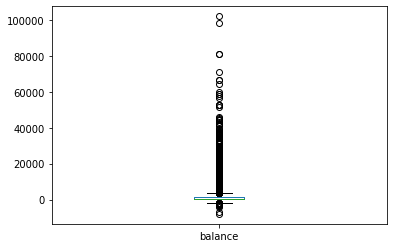

In [83]:
inp1.balance.plot.box()
plt.show()

Evaluate correctness of the data

Inspect the high value records - 
 - this will help identify issues
 - or even trash data

Education vs. campaign success

In [84]:
inp1.education.value_counts()

secondary    23180
tertiary     13286
primary       6839
unknown       1856
Name: education, dtype: int64

In [85]:
inp1.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [88]:
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [86]:
inp1['response_flag'] = np.where(inp1.response=="yes",1,0)

In [87]:
inp1.response_flag.value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

In [89]:
inp1.response_flag.mean()

0.1170257523084077

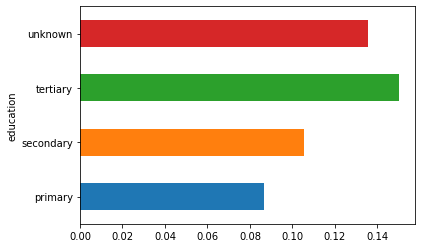

In [90]:
inp1.groupby(['education'])['response_flag'].mean().plot.barh()